# Importing modules

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
#!pip install catboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Loading the datasets

In [5]:
train = pd.read_csv(r"dataset\train.csv")
test = pd.read_csv(r"dataset\test.csv")
print(train.shape)
print(test.shape)

(22083, 45)
(9465, 43)


In [6]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [7]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [8]:
ids = test['Patient Id']
ids

0       PID0x4175
1       PID0x21f5
2       PID0x49b8
3       PID0x2d97
4       PID0x58da
          ...    
9460    PID0x81e1
9461    PID0x3514
9462    PID0x5408
9463    PID0x2017
9464    PID0x7f61
Name: Patient Id, Length: 9465, dtype: object

# Exploratory Data Analysis

Removing unimportant column data, renaming them, looking at target variables, handling missing values

Lets start by listing out some UNimportant features (according to me)

In [9]:
print(train.shape)
print(train.columns)

(22083, 45)
Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Sy

In [10]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [11]:
# Lets start by listing out some UNimportant features (according to me)

# Patient Id
# Patient First Name
# Family Name
# Father' name
# Institute Name
# Parental consent,etc

#train.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name","Mother's age","Father's age",'Location of Institute', 'Institute Name', 'Parental consent', 'Place of birth', 'No. of previous abortion'], inplace = True, axis=1)
#train.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5', 'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5'], inplace=True, axis=1 )
#train.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5'], inplace=True, axis=1 )
train.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name",'Location of Institute', 'Institute Name', 'Place of birth'], inplace=True, axis=1)


#test.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name","Mother's age","Father's age",'Location of Institute', 'Institute Name', 'Parental consent', 'Place of birth', 'No. of previous abortion'], inplace = True, axis=1)
#test.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5', 'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5'], inplace=True, axis=1 )
#test.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5'], inplace=True, axis=1 )
test.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name",'Location of Institute', 'Institute Name', 'Place of birth'], inplace=True, axis=1)


print(train.shape)
print(test.shape)

(22083, 38)
(9465, 36)


In [12]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [13]:
# Renaming column names for better understanding and processing

#'Place of birth' : 'Place_of_birth',
#'No. of previous abortion' : 'No_of_previous_abortions',

train.rename( columns = {
    'Patient Age' : 'Patient_age',
    "Genes in mother's side" : "Genes_mother_side",
    "Inherited from father" : "Genes_father_side",
    'Maternal gene' : 'Genes_maternal_side',
    'Paternal gene' : 'Genes_paternal_side',
    'Blood cell count (mcL)' : 'Blood_cell_count_mcL',
    "Mother's age" : "Mothers_age",
    "Father's age" : "Fathers_age",
    'Respiratory Rate (breaths/min)' : 'Respiratory_rate',
    'Heart Rate (rates/min' : 'Heart_rate',
    'Parental consent' : 'Parental_consent',
    'Follow-up' : 'Follow_up',
    'Birth asphyxia' : 'Birth_asphyxia',
    'Autopsy shows birth defect (if applicable)' : 'Autopsy_birth_defect',
    'Folic acid details (peri-conceptional)' : 'Folic_acid_details',
    'H/O serious maternal illness' : 'Serious_maternal_illness',
    'H/O radiation exposure (x-ray)' : 'Radiation_exposure',
    'H/O substance abuse' : 'Substance_abuse',
    'Assisted conception IVF/ART' : 'Assisted_conception',
    'No. of previous abortion':'No_of_previous_abortion',
    'History of anomalies in previous pregnancies' : 'History_of_anomalies_in_previous_pregnancies',
    'Birth defects' : 'Birth_defects',
    'White Blood cell count (thousand per microliter)' : 'White_blood_cell_count',
    'Blood test result' : 'Blood_test_result',
    'Genetic Disorder' : 'Genetic_disorder',
    'Disorder Subclass' : 'Disorder_subclass',
    'Test 1' : 'Test_1',
    'Test 2' : 'Test_2',
    'Test 3' : 'Test_3',
    'Test 4' : 'Test_4',
    'Test 5' : 'Test_5',
    'Symptom 1' : 'Symptom_1',
    'Symptom 2' : 'Symptom_2',
    'Symptom 3' : 'Symptom_3',
    'Symptom 4' : 'Symptom_4',
    'Symptom 5' : 'Symptom_5'
    
    
}, inplace=True
)

test.rename( columns = {
    'Patient Age' : 'Patient_age',
    "Genes in mother's side" : "Genes_mother_side",
    "Inherited from father" : "Genes_father_side",
    'Maternal gene' : 'Genes_maternal_side',
    'Paternal gene' : 'Genes_paternal_side',
    'Blood cell count (mcL)' : 'Blood_cell_count_mcL',
    "Mother's age" : "Mothers_age",
    "Father's age" : "Fathers_age",
    'Respiratory Rate (breaths/min)' : 'Respiratory_rate',
    'Heart Rate (rates/min' : 'Heart_rate',
    'Parental consent' : 'Parental_consent',
    'Follow-up' : 'Follow_up',
    'Birth asphyxia' : 'Birth_asphyxia',
    'Autopsy shows birth defect (if applicable)' : 'Autopsy_birth_defect',
    
    'Folic acid details (peri-conceptional)' : 'Folic_acid_details',
    'H/O serious maternal illness' : 'Serious_maternal_illness',
    'H/O radiation exposure (x-ray)' : 'Radiation_exposure',
    'H/O substance abuse' : 'Substance_abuse',
    'Assisted conception IVF/ART' : 'Assisted_conception',
    'No. of previous abortion':'No_of_previous_abortion',
    'History of anomalies in previous pregnancies' : 'History_of_anomalies_in_previous_pregnancies',
    
    'Birth defects' : 'Birth_defects',
    'White Blood cell count (thousand per microliter)' : 'White_blood_cell_count',
    'Blood test result' : 'Blood_test_result',
    'Genetic Disorder' : 'Genetic_disorder',
    'Disorder Subclass' : 'Disorder_subclass',
    'Test 1' : 'Test_1',
    'Test 2' : 'Test_2',
    'Test 3' : 'Test_3',
    'Test 4' : 'Test_4',
    'Test 5' : 'Test_5',
    'Symptom 1' : 'Symptom_1',
    'Symptom 2' : 'Symptom_2',
    'Symptom 3' : 'Symptom_3',
    'Symptom 4' : 'Symptom_4',
    'Symptom 5' : 'Symptom_5'
    
    
}, inplace=True
)

In [14]:
print(train.columns)
print(test.columns)

Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Mothers_age', 'Fathers_age', 'Status', 'Respiratory_rate',
       'Heart_rate', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_birth_defect', 'Folic_acid_details',
       'Serious_maternal_illness', 'Radiation_exposure', 'Substance_abuse',
       'Assisted_conception', 'History_of_anomalies_in_previous_pregnancies',
       'No_of_previous_abortion', 'Birth_defects', 'White_blood_cell_count',
       'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')
Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Mothers_age', 'Fathers_age', 'Status', 'Respiratory_rate

In [15]:
print(train.shape)
print(test.shape)

(22083, 38)
(9465, 36)


Taking a look at our target variabless : Genetic disorder & Disorder subclass

In [16]:
train.loc[:, ['Genetic_disorder','Disorder_subclass']]

,Genetic_disorder,Disorder_subclass
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,NaN,Cystic fibrosis
2,Multifactorial genetic inheritance disorders,Diabetes
3,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Multifactorial genetic inheritance disorders,Cancer
...,...,...
22078,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,Multifactorial genetic inheritance disorders,Diabetes
22080,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,NaN,Leigh syndrome


In [17]:
print(train['Genetic_disorder'].unique())
print('--------')
print(train['Genetic_disorder'].value_counts())

['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
--------
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic_disorder, dtype: int64


In [18]:
print(train['Disorder_subclass'].unique())
print('--------')
print(train['Disorder_subclass'].value_counts())

["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]
--------
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder_subclass, dtype: int64


================================================================================================

Clearly this is two target variable multi-class classification problem with imbalanced classes

================================================================================================

Text(0.5, 1.0, 'Label Variables (Target Variable 2)')

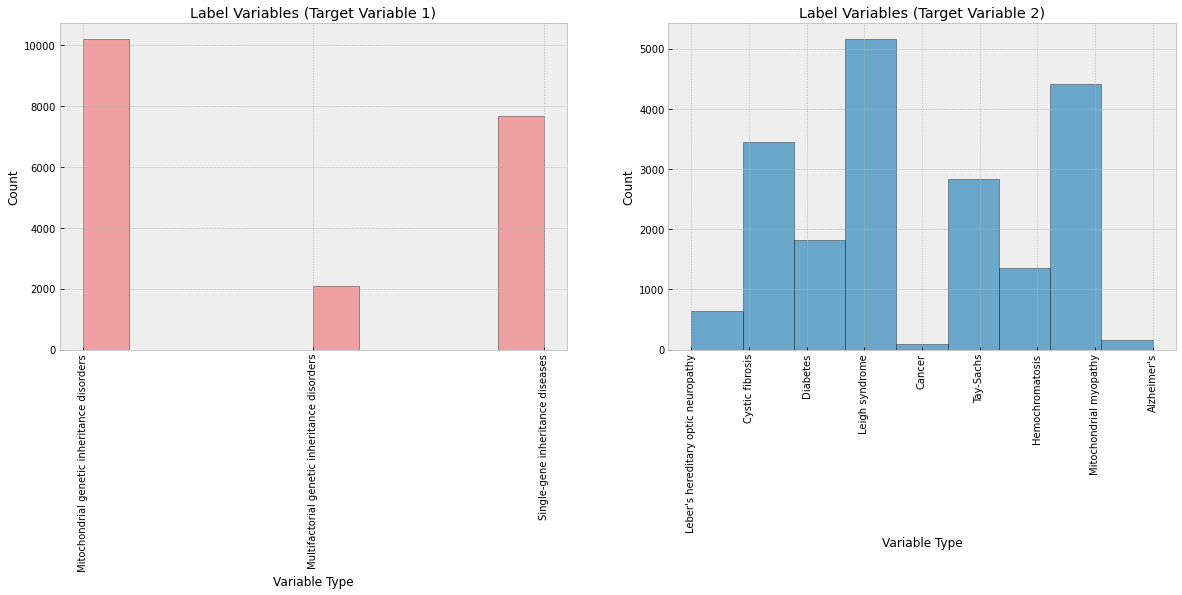

In [19]:
# Histogram plots of label values
plt.style.use('bmh')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))


train['Genetic_disorder'].hist(edgecolor= 'black', ax=ax1, alpha=0.7, color = '#F08080')
ax1.tick_params(axis='x', labelrotation=90 )
ax1.set_xlabel('Variable Type')
ax1.set_ylabel('Count')
ax1.set_title('Label Variables (Target Variable 1)')

ax2 = train['Disorder_subclass'].hist(bins= 9,ax=ax2 ,edgecolor='black', alpha=0.7)
ax2.tick_params(axis='x', labelrotation=90 )
ax2.set_xlabel('Variable Type')
ax2.set_ylabel('Count')
ax2.set_title('Label Variables (Target Variable 2)')

In [20]:
print(train.Genetic_disorder.describe())
print('--------------------------------')
print(train.Disorder_subclass.describe())

count                                           19937
unique                                              3
top       Mitochondrial genetic inheritance disorders
freq                                            10202
Name: Genetic_disorder, dtype: object
--------------------------------
count              19915
unique                 9
top       Leigh syndrome
freq                5160
Name: Disorder_subclass, dtype: object


===========================================================

Relationship of target variables with Numerical features

===========================================================

In [21]:
categorical_features = [ cname for cname in train.columns if train[cname].dtype in ['object'] ]
categorical_features.remove('Genetic_disorder')
categorical_features.remove('Disorder_subclass')

numerical_features = [ cname for cname in train.columns if train[cname].dtype in ['int64','float64'] ]
print(categorical_features)
print(len(categorical_features))
print(train.shape)
print(test.shape)
print('-----------------------------------------')
print(numerical_features)
print(len(numerical_features))

['Genes_mother_side', 'Genes_father_side', 'Genes_maternal_side', 'Genes_paternal_side', 'Status', 'Respiratory_rate', 'Heart_rate', 'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia', 'Autopsy_birth_defect', 'Folic_acid_details', 'Serious_maternal_illness', 'Radiation_exposure', 'Substance_abuse', 'Assisted_conception', 'History_of_anomalies_in_previous_pregnancies', 'Birth_defects', 'Blood_test_result']
20
(22083, 38)
(9465, 36)
-----------------------------------------
['Patient_age', 'Blood_cell_count_mcL', 'Mothers_age', 'Fathers_age', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'No_of_previous_abortion', 'White_blood_cell_count', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']
16


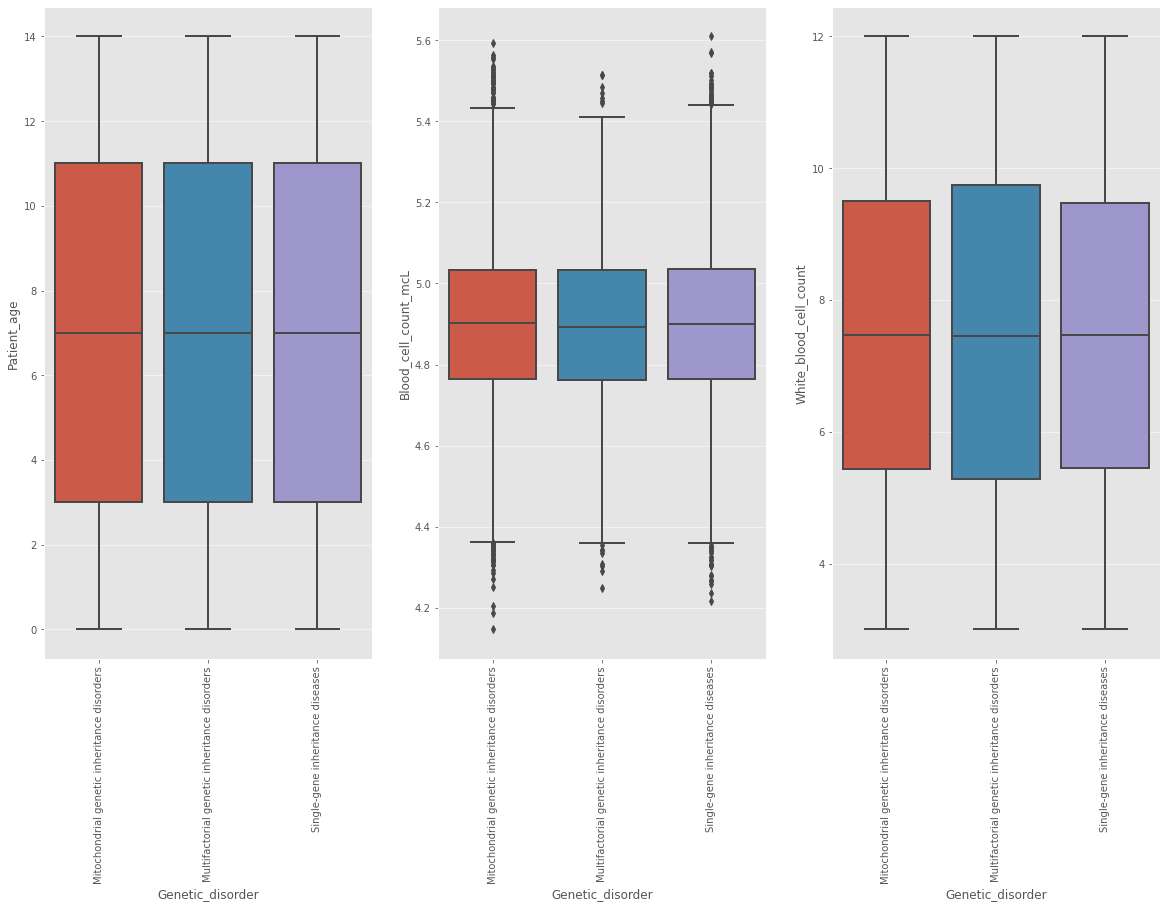

In [22]:
# Relationship of Target variables with Numerical variables
plt.style.use('ggplot')
labels = train.Genetic_disorder.unique()

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,12))

sns.boxplot( ax= ax1, x='Genetic_disorder', y='Patient_age', data=train )
ax1.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax2,x='Genetic_disorder', y='Blood_cell_count_mcL', data=train )
ax2.tick_params(axis='x', labelrotation=90 )

#sns.boxplot( ax= ax3,x='Genetic_disorder', y='No_of_previous_abortions', data=train )
#ax3.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax3,x='Genetic_disorder', y='White_blood_cell_count', data=train )
ax3.tick_params(axis='x', labelrotation=90 )

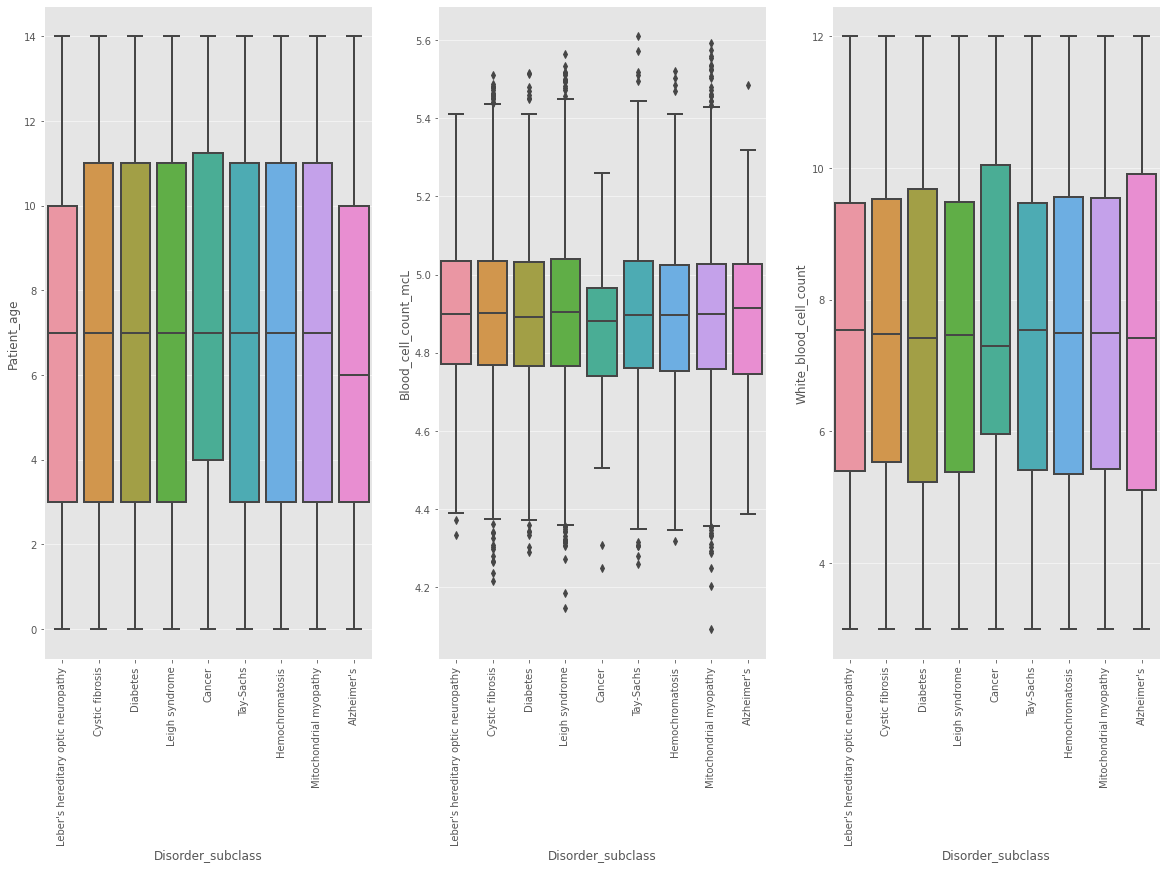

In [23]:
plt.style.use('ggplot')
labels = train.Disorder_subclass.unique()

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,12))

sns.boxplot( ax= ax1, x='Disorder_subclass', y='Patient_age', data=train )
ax1.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax2,x='Disorder_subclass', y='Blood_cell_count_mcL', data=train )
ax2.tick_params(axis='x', labelrotation=90 )

#sns.boxplot( ax= ax3,x='Disorder_subclass', y='No_of_previous_abortions', data=train )
#ax3.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax3,x='Disorder_subclass', y='White_blood_cell_count', data=train )
ax3.tick_params(axis='x', labelrotation=90 )

In [24]:
#Takeaways
#Blood_cell_count_mcL has outliers for both the target variables

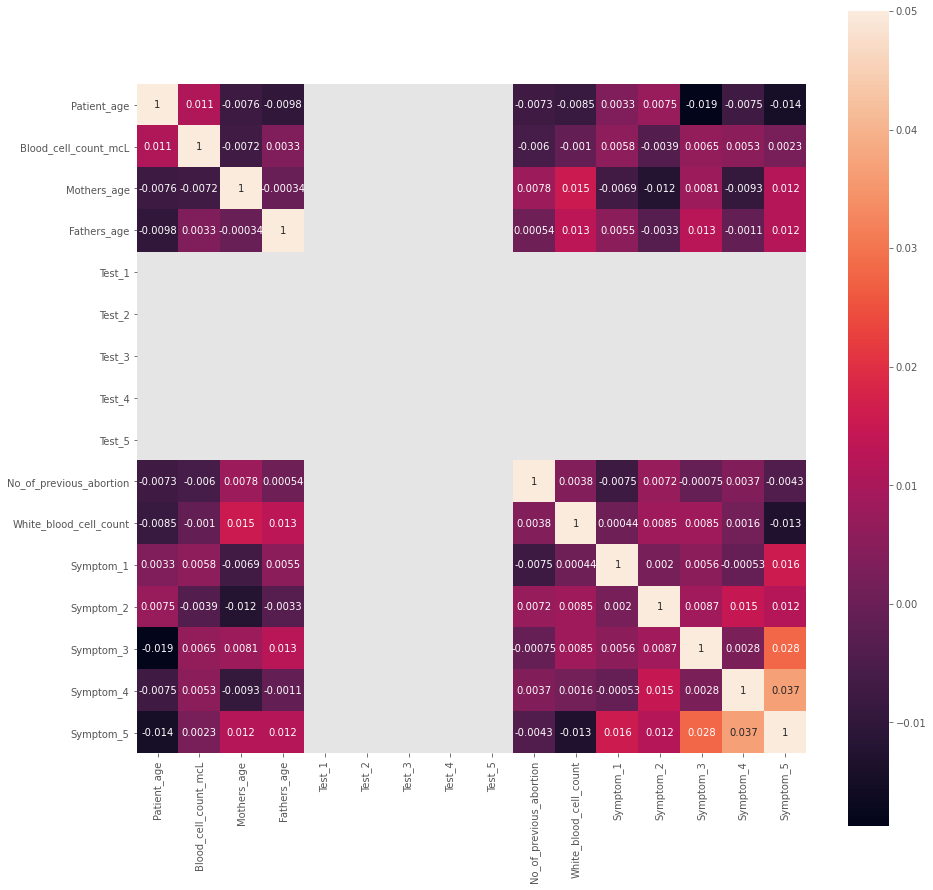

In [25]:
plt.figure(figsize=(15,15))
corr = train.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,vmax=0.05, annot=True, square=True)
plt.show()

In [26]:
#From my observations, I will be omitting the Test 1-5 features.

<Figure size 864x576 with 0 Axes>

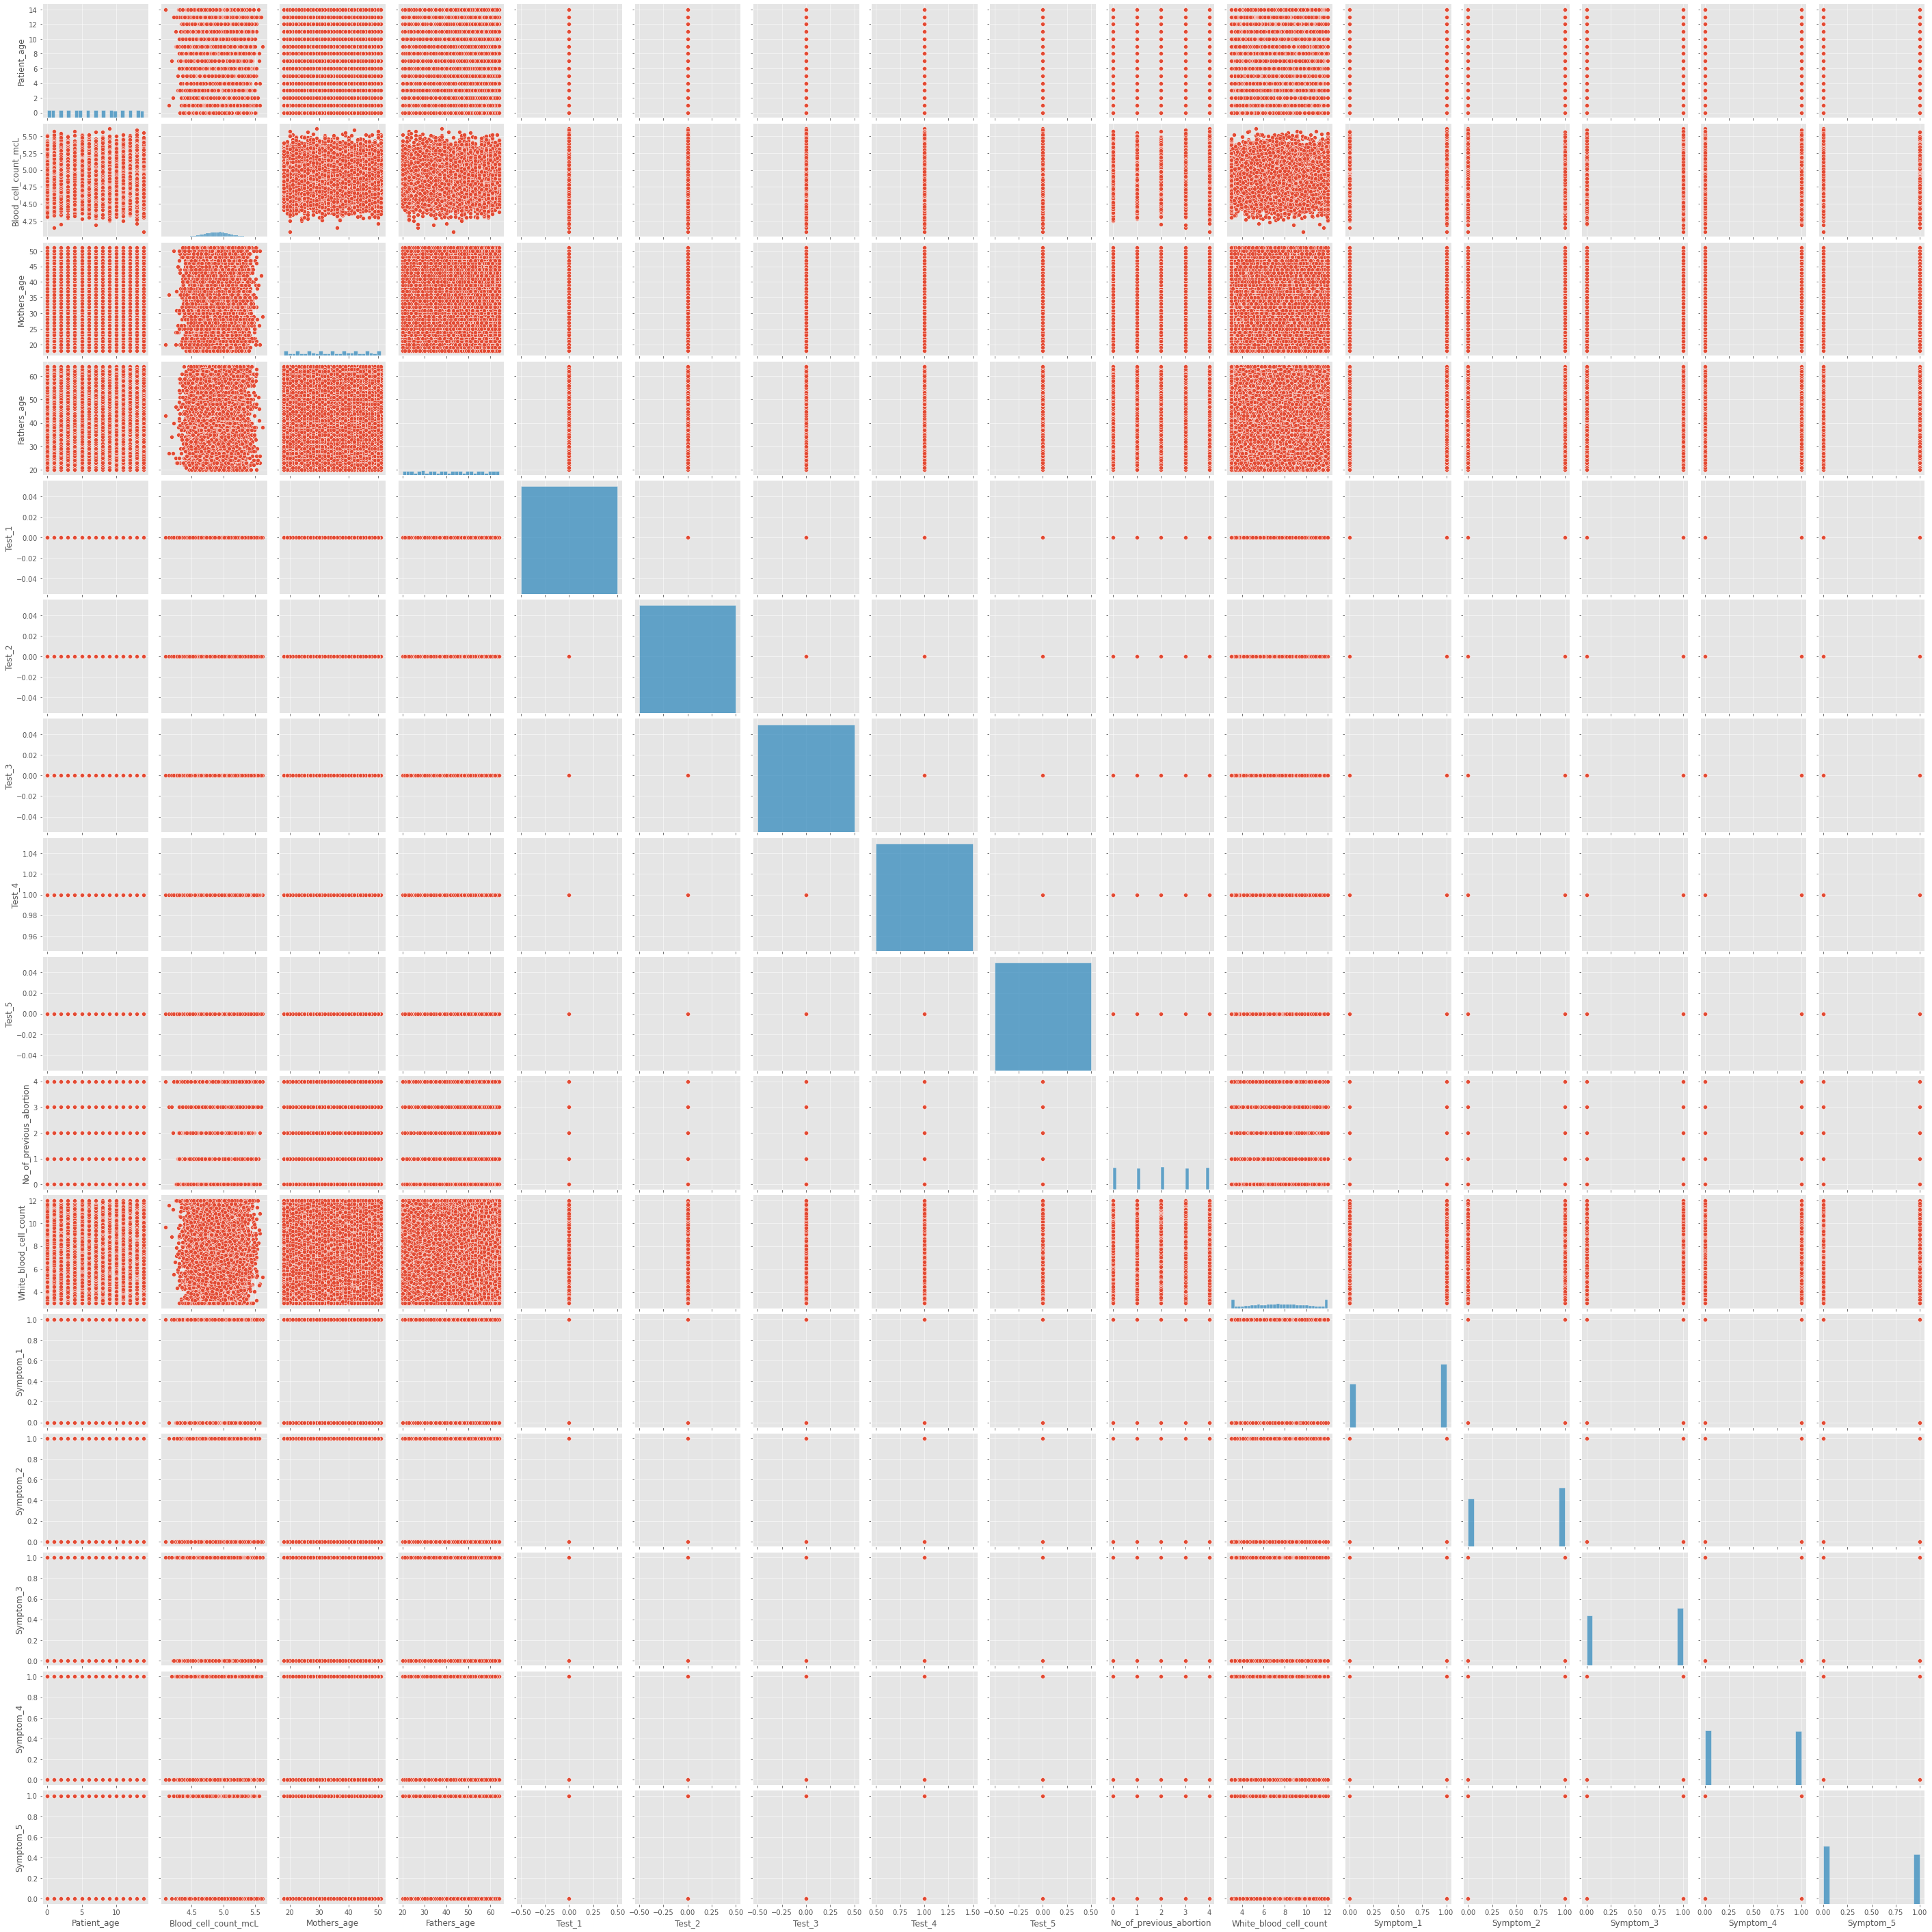

In [27]:
plt.figure(figsize=(12,8))
sns.pairplot( train[numerical_features] )
plt.show()

In [28]:
# Handling incorrect and missing values

print(train.shape)
print(np.prod(train.shape))
print(train.isnull().sum().sum())
print( (train.isnull().sum().sum())/(np.prod(train.shape)) )
print('------------------------------------')
print(test.shape)
print(np.prod(test.shape))
print(test.isnull().sum().sum())
print( (test.isnull().sum().sum())/(np.prod(test.shape)) )

(22083, 38)
839154
77770
0.09267667198154332
------------------------------------
(9465, 36)
340740
10060
0.02952397722603745


In [29]:
train.isnull().sum().sort_values(ascending=False)

Mothers_age                                     6036
Fathers_age                                     5986
Genes_maternal_side                             2810
Symptom_2                                       2222
Substance_abuse                                 2195
Gender                                          2173
History_of_anomalies_in_previous_pregnancies    2172
Test_5                                          2170
Disorder_subclass                               2168
Follow_up                                       2166
No_of_previous_abortion                         2162
Symptom_1                                       2155
Birth_defects                                   2154
Symptom_5                                       2153
Radiation_exposure                              2153
Serious_maternal_illness                        2152
Test_2                                          2152
Respiratory_rate                                2149
White_blood_cell_count                        

In [30]:
test.isnull().sum().sort_values(ascending=False)

Genes_maternal_side                             3723
Heart_rate                                      2900
Respiratory_rate                                2886
Genes_father_side                                551
Birth_defects                                      0
Serious_maternal_illness                           0
Radiation_exposure                                 0
Substance_abuse                                    0
Assisted_conception                                0
History_of_anomalies_in_previous_pregnancies       0
No_of_previous_abortion                            0
Patient_age                                        0
White_blood_cell_count                             0
Autopsy_birth_defect                               0
Blood_test_result                                  0
Symptom_1                                          0
Symptom_2                                          0
Symptom_3                                          0
Symptom_4                                     

In [32]:
train.dropna(subset=['Genetic_disorder', 'Disorder_subclass'], how='any', inplace=True)
train.dropna(axis=1, how="all", inplace=True)
train.dropna(axis=0, how='all', inplace=True)

test.dropna(axis=1, how="all", inplace=True)
test.dropna(axis=0, how='all', inplace=True)
print(train.shape)
print(test.shape)

(18047, 38)
(9465, 36)


In [33]:
# train.isnull().sum().sort_values(ascending=False)
# test.isnull().sum().sort_values(ascending=False)

In [34]:
#Checking for categorical columns with high cardinality
object_cols = [ train[cname].nunique() for cname in categorical_features] 
object_cols

#There arent any( cardinality <10 ) 

[2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4]

In [35]:
train.columns

Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Mothers_age', 'Fathers_age', 'Status', 'Respiratory_rate',
       'Heart_rate', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_birth_defect', 'Folic_acid_details',
       'Serious_maternal_illness', 'Radiation_exposure', 'Substance_abuse',
       'Assisted_conception', 'History_of_anomalies_in_previous_pregnancies',
       'No_of_previous_abortion', 'Birth_defects', 'White_blood_cell_count',
       'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient_age                                   16987 non-null  float64
 1   Genes_mother_side                             18047 non-null  object 
 2   Genes_father_side                             17827 non-null  object 
 3   Genes_maternal_side                           15976 non-null  object 
 4   Genes_paternal_side                           18047 non-null  object 
 5   Blood_cell_count_mcL                          18047 non-null  float64
 6   Mothers_age                                   13590 non-null  float64
 7   Fathers_age                                   13629 non-null  float64
 8   Status                                        18047 non-null  object 
 9   Respiratory_rate                              16477 non-null 

In [37]:
for column in train:
    columnSeriesObj = train[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())
    print("---------------------------------------------")

Column Name :  Patient_age
Column Contents :  [ 2.  6. 12. 11. 14.  3.  4.  7.  1.  0. nan 10.  5.  8.  9. 13.]
---------------------------------------------
Column Name :  Genes_mother_side
Column Contents :  ['Yes' 'No']
---------------------------------------------
Column Name :  Genes_father_side
Column Contents :  ['No' 'Yes' nan]
---------------------------------------------
Column Name :  Genes_maternal_side
Column Contents :  ['Yes' 'No' nan]
---------------------------------------------
Column Name :  Genes_paternal_side
Column Contents :  ['No' 'Yes']
---------------------------------------------
Column Name :  Blood_cell_count_mcL
Column Contents :  [4.76060309 4.89329743 4.70528039 ... 4.97422049 5.1864702  4.73806671]
---------------------------------------------
Column Name :  Mothers_age
Column Contents :  [nan 41. 21. 32. 40. 45. 44. 50. 30. 24. 36. 51. 23. 49. 46. 18. 38. 37.
 42. 48. 28. 25. 19. 47. 34. 35. 22. 33. 20. 29. 26. 31. 27. 43. 39.]
------------------------

In [38]:
for column in test:
    columnSeriesObj = test[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())
    print("---------------------------------------------")

Column Name :  Patient_age
Column Contents :  [ 6 10  5 13  9  4 12  3  1  0 14  8  2 11  7]
---------------------------------------------
Column Name :  Genes_mother_side
Column Contents :  ['No' 'Yes']
---------------------------------------------
Column Name :  Genes_father_side
Column Contents :  ['Yes' 'No' nan]
---------------------------------------------
Column Name :  Genes_maternal_side
Column Contents :  ['No' nan 'Yes']
---------------------------------------------
Column Name :  Genes_paternal_side
Column Contents :  ['No' 'Yes']
---------------------------------------------
Column Name :  Blood_cell_count_mcL
Column Contents :  [4.98165485 5.11888952 4.87620391 ... 4.89835233 4.80483966 5.42123643]
---------------------------------------------
Column Name :  Mothers_age
Column Contents :  [38 33 48 25 41 27 19 37 28 39 49 40 22 21 46 24 30 47 20 42 35 36 51 50
 45 34 44 43 32 26 31 18 23 29]
---------------------------------------------
Column Name :  Fathers_age
Column C

In [39]:
test.Symptom_1 = test.Symptom_1.astype(int)
test.Symptom_2 = test.Symptom_2.astype(int)
test.Symptom_3 = test.Symptom_3.astype(int)
test.Symptom_4 = test.Symptom_4.astype(int)
test.Symptom_5 = test.Symptom_5.astype(int)
#test.Test_1.replace( to_replace=-99, value=1, inplace=True )
#test.Test_2.replace( to_replace=-99, value=1, inplace=True )
#test.Test_3.replace( to_replace=-99, value=1, inplace=True )
#test.Test_4.replace( to_replace=-99, value=0, inplace=True )
#test.Test_5.replace( to_replace=-99, value=1, inplace=True )

print(test.White_blood_cell_count.unique())
print(test.White_blood_cell_count.describe())

[-99.           8.17958359   6.88407127 ...   4.8595362    5.6960619
   7.49276517]
count    9465.000000
mean      -16.155621
std        44.328480
min       -99.000000
25%         3.000000
50%         6.359714
75%         8.896115
max        12.000000
Name: White_blood_cell_count, dtype: float64


In [40]:
train.Patient_age.fillna( value = pd.Series.mode(train.Patient_age)[0], inplace=True )
train.Patient_age = train.Patient_age.astype('int64')

train.Genes_father_side.fillna( value = pd.Series.mode(train.Genes_father_side)[0], inplace=True )

train.Genes_maternal_side.fillna( value = pd.Series.mode(train.Genes_maternal_side)[0], inplace=True )

train.Mothers_age.fillna( value = pd.Series.mode(train.Mothers_age)[0], inplace=True )

train.Fathers_age.fillna( value = pd.Series.mode(train.Fathers_age)[0], inplace=True )

train.Respiratory_rate.fillna( value = pd.Series.mode(train.Respiratory_rate)[0], inplace=True )

train.Heart_rate.fillna( value = pd.Series.mode(train.Heart_rate)[0], inplace=True )

train.Test_1.fillna( value = pd.Series.mode(train.Test_1)[0], inplace=True )
train.Test_2.fillna( value = pd.Series.mode(train.Test_2)[0], inplace=True )
train.Test_3.fillna( value = pd.Series.mode(train.Test_3)[0], inplace=True )
train.Test_4.fillna( value = pd.Series.mode(train.Test_4)[0], inplace=True )
train.Test_5.fillna( value = pd.Series.mode(train.Test_5)[0], inplace=True )

train.Parental_consent.fillna( value = pd.Series.mode(train.Parental_consent)[0], inplace=True )

train.Follow_up.fillna( value = pd.Series.mode(train.Follow_up)[0], inplace=True )

train.Gender.fillna( value = pd.Series.mode(train.Gender)[0], inplace=True )

train.Birth_asphyxia.fillna( value = pd.Series.mode(train.Birth_asphyxia)[0], inplace=True )

train.Autopsy_birth_defect.fillna( value = pd.Series.mode(train.Autopsy_birth_defect)[0], inplace=True )

train.Folic_acid_details.fillna( value = pd.Series.mode(train.Folic_acid_details)[0], inplace=True )

train.Serious_maternal_illness.fillna( value = pd.Series.mode(train.Serious_maternal_illness)[0], inplace=True )

train.Radiation_exposure.fillna( value = pd.Series.mode(train.Radiation_exposure)[0], inplace=True )

train.Substance_abuse.fillna( value = pd.Series.mode(train.Substance_abuse)[0], inplace=True )

train.Assisted_conception.fillna( value = pd.Series.mode(train.Assisted_conception)[0], inplace=True )

train.History_of_anomalies_in_previous_pregnancies.fillna( value = pd.Series.mode(train.History_of_anomalies_in_previous_pregnancies)[0], inplace=True )

train.No_of_previous_abortion.fillna( value = pd.Series.mode(train.No_of_previous_abortion)[0], inplace=True )

train.Birth_defects.fillna( value = pd.Series.mode(train.Birth_defects)[0], inplace=True )

train.White_blood_cell_count.fillna( value = pd.Series.mode(train.White_blood_cell_count)[0], inplace=True )

train.Blood_test_result.fillna( value = pd.Series.mode(train.Blood_test_result)[0], inplace=True )

train.Symptom_1.fillna( value = pd.Series.mode(train.Symptom_1)[0], inplace=True )
train.Symptom_2.fillna( value = pd.Series.mode(train.Symptom_2)[0], inplace=True )
train.Symptom_3.fillna( value = pd.Series.mode(train.Symptom_3)[0], inplace=True )
train.Symptom_4.fillna( value = pd.Series.mode(train.Symptom_4)[0], inplace=True )
train.Symptom_5.fillna( value = pd.Series.mode(train.Symptom_5)[0], inplace=True )



# train.Genes_maternal_side.fillna(value=train.Genes_maternal_side.value_counts().index[0], inplace=True)

# train.Substance_abuse.replace( to_replace='-', value = 'Not applicable', inplace=True )
# #train.Substance_abuse.replace( to_replace='Not applicable', value = np.nan, inplace=True )
# train.Substance_abuse.fillna(value=train.Substance_abuse.value_counts().index[0], inplace=True)

# train.History_of_anomalies_in_previous_pregnancies.fillna(value=train.History_of_anomalies_in_previous_pregnancies.value_counts().index[0], inplace=True)

# avg_wbc = np.nanmean(train.White_blood_cell_count)
# train.White_blood_cell_count.fillna(value =avg_wbc, inplace=True)

# #train.Place_of_birth.fillna(method='bfill', inplace=True)

# train.Assisted_conception.fillna(value=train.Assisted_conception.value_counts().index[0], inplace=True)

# train.Radiation_exposure.replace( to_replace='-', value = 'Not applicable', inplace=True )
# #train.Radiation_exposure.replace( to_replace='Not applicable', value = np.nan, inplace=True )
# train.Radiation_exposure.fillna(value=train.Radiation_exposure.value_counts().index[0], inplace=True)
# #train.Radiation_exposure.fillna('Yes', inplace=True)


# train.Follow_up.fillna(value=train.Follow_up.value_counts().index[0], inplace=True)

# train.Gender.fillna('Ambiguous', inplace=True)

# train.Respiratory_rate.fillna(value=train.Respiratory_rate.value_counts().index[0], inplace=True)

# train.Birth_defects.fillna(value=train.Birth_defects.value_counts().index[0], inplace=True)

# train.Folic_acid_details.fillna(value=train.Folic_acid_details.value_counts().index[0], inplace=True)

# train.Blood_test_result.fillna(value=train.Blood_test_result.value_counts().index[0], inplace=True)

# train.Serious_maternal_illness.fillna(value=train.Serious_maternal_illness.value_counts().index[0], inplace=True)

# #train.Birth_asphyxia.replace(to_replace='No record', value=np.nan , inplace=True)
# train.Birth_asphyxia.replace( to_replace='Not available', value = 'No record', inplace=True )
# train.Birth_asphyxia.fillna(value=train.Birth_asphyxia.value_counts().index[0], inplace=True)


# #median_abortions = train.No_of_previous_abortions.median()
# #train.No_of_previous_abortions.fillna(median_abortions, inplace=True)

# train.Heart_rate.fillna(value=train.Heart_rate.value_counts().index[0], inplace=True)

# median_age = train.Patient_age.median()
# train.Patient_age.fillna(median_age, inplace=True)

# train.Autopsy_birth_defect.replace( to_replace='None', value='Not applicable' , inplace=True )
# #train.Autopsy_birth_defect.replace( to_replace='Not applicable', value = np.nan, inplace=True )
# train.Autopsy_birth_defect.fillna(value=train.Autopsy_birth_defect.value_counts().index[0], inplace=True)
# #train.Autopsy_birth_defect.fillna('Yes', inplace=True)

# train.Genes_father_side.fillna(value=train.Genes_father_side.value_counts().index[0], inplace=True)

# #test1_mode = train.Test_1.mode()
# #print(test1_mode[0])
# #train.Test_1.fillna(test1_mode[0], inplace=True)

# #test2_mode = train.Test_2.mode()
# #train.Test_2.fillna(test2_mode[0], inplace=True)

# #test3_mode = train.Test_3.mode()
# #train.Test_3.fillna(test3_mode[0], inplace=True)

# #test4_mode = train.Test_4.mode()
# #train.Test_4.fillna(test4_mode[0], inplace=True)

# #test5_mode = train.Test_5.mode()
# #train.Test_5.fillna(test5_mode[0], inplace=True)

# symptom1_mode = train.Symptom_1.mode()
# #print(test1_mode[0])
# train.Symptom_1.fillna(symptom1_mode[0], inplace=True)

# symptom2_mode = train.Symptom_2.mode()
# train.Symptom_2.fillna(symptom2_mode[0], inplace=True)

# symptom3_mode = train.Symptom_3.mode()
# train.Symptom_3.fillna(symptom3_mode[0], inplace=True)

# symptom4_mode = train.Symptom_4.mode()
# train.Symptom_4.fillna(symptom4_mode[0], inplace=True)

# symptom5_mode = train.Symptom_5.mode()
# train.Symptom_5.fillna(symptom5_mode[0], inplace=True)

In [41]:
train.isnull().sum()

Patient_age                                     0
Genes_mother_side                               0
Genes_father_side                               0
Genes_maternal_side                             0
Genes_paternal_side                             0
Blood_cell_count_mcL                            0
Mothers_age                                     0
Fathers_age                                     0
Status                                          0
Respiratory_rate                                0
Heart_rate                                      0
Test_1                                          0
Test_2                                          0
Test_3                                          0
Test_4                                          0
Test_5                                          0
Parental_consent                                0
Follow_up                                       0
Gender                                          0
Birth_asphyxia                                  0


In [31]:
test.Genes_maternal_side.fillna(value=test.Genes_maternal_side.value_counts().index[0], inplace=True)

test.Heart_rate.replace( to_replace='-99', value = np.nan, inplace=True )
test.Heart_rate.fillna( value=test.Heart_rate.value_counts().index[0], inplace=True)

test.Respiratory_rate.replace( to_replace='-99', value = np.nan, inplace=True )
test.Respiratory_rate.fillna(value=test.Respiratory_rate.value_counts().index[0], inplace=True)

test.Genes_father_side.fillna(value=test.Genes_father_side.value_counts().index[0], inplace=True)

test.White_blood_cell_count.replace( to_replace=-99, value = np.nan, inplace=True )
test.White_blood_cell_count.fillna(value=test.White_blood_cell_count.value_counts().index[0] , inplace=True)

test.Birth_defects.replace( to_replace='-99', value = np.nan, inplace=True )
test.Birth_defects.fillna(value= test.Birth_defects.value_counts().index[0] , inplace=True)

#test.No_of_previous_abortions.replace( to_replace=-99, value = np.nan, inplace=True )
#test.No_of_previous_abortions.fillna(method='bfill',inplace=True)

test.History_of_anomalies_in_previous_pregnancies.replace( to_replace='-99', value = np.nan, inplace=True )
test.History_of_anomalies_in_previous_pregnancies.fillna(value =test.History_of_anomalies_in_previous_pregnancies.value_counts().index[0] , inplace=True)

test.Assisted_conception.replace( to_replace='-99', value = np.nan, inplace=True )
test.Assisted_conception.fillna(value=test.Assisted_conception.value_counts().index[0] , inplace=True)

test.Substance_abuse.replace( to_replace='-99', value = 'Not applicable', inplace=True )
test.Substance_abuse.replace( to_replace='-', value = 'Not applicable', inplace=True )
#test.Substance_abuse.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Substance_abuse.fillna(value=test.Substance_abuse.value_counts().index[0] , inplace=True)
#test.Substance_abuse.fillna('Yes', inplace=True)

test.Radiation_exposure.replace( to_replace='-99', value = 'Not applicable', inplace=True )
test.Radiation_exposure.replace( to_replace='-', value = 'Not applicable', inplace=True )
#test.Radiation_exposure.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Radiation_exposure.fillna(value=test.Radiation_exposure.value_counts().index[0] , inplace=True)
#test.Radiation_exposure.fillna('Yes', inplace=True)

test.Serious_maternal_illness.replace( to_replace='-99', value = np.nan, inplace=True )
test.Serious_maternal_illness.fillna(value=test.Serious_maternal_illness.value_counts().index[0] , inplace=True)

test.Folic_acid_details.replace( to_replace='-99', value = np.nan, inplace=True )
test.Folic_acid_details.fillna(value=test.Folic_acid_details.value_counts().index[0] , inplace=True)

#test.Place_of_birth.replace( to_replace='-99', value = np.nan, inplace=True )
#test.Place_of_birth.fillna(method= 'bfill',inplace=True)

test.Autopsy_birth_defect.replace( to_replace='-99', value = 'Not applicable', inplace=True )
test.Autopsy_birth_defect.replace( to_replace='None', value = 'Not applicable', inplace=True )
#test.Autopsy_birth_defect.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Autopsy_birth_defect.fillna(value=test.Autopsy_birth_defect.value_counts().index[0] , inplace=True)
#test.Autopsy_birth_defect.fillna('Yes', inplace=True)

test.Birth_asphyxia.replace( to_replace='-99', value = 'No record', inplace=True )
#test.Birth_asphyxia.replace( to_replace='No record', value = np.nan, inplace=True )
test.Birth_asphyxia.replace( to_replace='Not available', value = 'No record', inplace=True )
test.Birth_asphyxia.fillna(value= test.Birth_asphyxia.value_counts().index[0], inplace=True)
#test.Birth_asphyxia.fillna('Yes', inplace=True)

test.Gender.replace( to_replace='-99', value = np.nan, inplace=True )
test.Gender.fillna(value='Ambiguous',inplace=True)

test.Follow_up.replace( to_replace='-99', value = np.nan, inplace=True )
test.Follow_up.fillna(value=test.Follow_up.value_counts().index[0],inplace=True)

test.Blood_test_result.replace( to_replace='-99', value = np.nan, inplace=True )
test.Blood_test_result.replace( to_replace='inconclusive', value = np.nan, inplace=True )
test.Blood_test_result.fillna(method='bfill',inplace=True)

In [32]:
train.isnull().sum().sort_values(ascending=False)

Disorder_subclass                               0
Folic_acid_details                              0
Genes_mother_side                               0
Genes_father_side                               0
Genes_maternal_side                             0
Genes_paternal_side                             0
Blood_cell_count_mcL                            0
Status                                          0
Respiratory_rate                                0
Heart_rate                                      0
Follow_up                                       0
Gender                                          0
Birth_asphyxia                                  0
Autopsy_birth_defect                            0
Serious_maternal_illness                        0
Genetic_disorder                                0
Radiation_exposure                              0
Substance_abuse                                 0
Assisted_conception                             0
History_of_anomalies_in_previous_pregnancies    0


In [33]:
test.isnull().sum().sort_values(ascending=False)

Symptom_5                                       0
Autopsy_birth_defect                            0
Genes_mother_side                               0
Genes_father_side                               0
Genes_maternal_side                             0
Genes_paternal_side                             0
Blood_cell_count_mcL                            0
Status                                          0
Respiratory_rate                                0
Heart_rate                                      0
Follow_up                                       0
Gender                                          0
Birth_asphyxia                                  0
Folic_acid_details                              0
Symptom_4                                       0
Serious_maternal_illness                        0
Radiation_exposure                              0
Substance_abuse                                 0
Assisted_conception                             0
History_of_anomalies_in_previous_pregnancies    0


In [34]:
#Done with missing values

In [35]:
print(train.shape)
print(test.shape)

(16246, 29)
(9465, 27)


In [36]:
train.Blood_cell_count_mcL = train.Blood_cell_count_mcL.round(2)
train.White_blood_cell_count = train.White_blood_cell_count.round(2)
train.Patient_age = train.Patient_age.astype('int64')
#train.No_of_previous_abortions = train.No_of_previous_abortions.astype('int64')

#train.Test_1 = train.Test_1.astype('int64')
#train.Test_2 = train.Test_2.astype('int64')
#train.Test_3 = train.Test_3.astype('int64')
#train.Test_4 = train.Test_4.astype('int64')
#train.Test_5 = train.Test_5.astype('int64')

train.Symptom_1 = train.Symptom_1.astype('int64')
train.Symptom_2 = train.Symptom_2.astype('int64')
train.Symptom_3 = train.Symptom_3.astype('int64')
train.Symptom_4 = train.Symptom_4.astype('int64')
train.Symptom_5 = train.Symptom_5.astype('int64')

train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,Ambiguous,No record,Not applicable,No,No,No,No,No,Yes,Singular,9.86,slightly abnormal,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,No record,Not applicable,Yes,No,Yes,Not applicable,Yes,Yes,Singular,7.47,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,Male,No record,No,No,Yes,Not applicable,Not applicable,Yes,Yes,Singular,7.92,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,Male,No record,Not applicable,No,Yes,Not applicable,Not applicable,Yes,No,Multiple,4.10,slightly abnormal,0,0,0,0,0,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,Female,No record,Not applicable,No,No,No,No,Yes,No,Multiple,10.27,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [37]:
test.Blood_cell_count_mcL = test.Blood_cell_count_mcL.round(2)
test.White_blood_cell_count = test.White_blood_cell_count.round(2)
test.Patient_age = test.Patient_age.astype('int64')
#test.No_of_previous_abortions = test.No_of_previous_abortions.astype('int64')

test.head()


#CHECK FOR NUNIQUE VALUES FOR ALL COLUMNS IN BOTH TRAIN AND TEST DATASETS

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,6,No,Yes,No,No,4.98,Alive,Tachypnea,Normal,Low,Male,Yes,Not applicable,Yes,No,Yes,Not applicable,No,No,Multiple,12.00,slightly abnormal,1,1,1,1,1
1,10,Yes,No,Yes,Yes,5.12,Alive,Normal (30-60),Tachycardia,Low,Male,Yes,Not applicable,Yes,No,Not applicable,Not applicable,No,Yes,Multiple,8.18,normal,0,0,0,1,0
2,5,No,No,No,No,4.88,Deceased,Normal (30-60),Normal,Low,Ambiguous,No record,Not applicable,No,Yes,Yes,Yes,Yes,No,Singular,12.00,slightly abnormal,0,0,1,1,0
3,13,No,Yes,Yes,No,4.69,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,No,Not applicable,Yes,Yes,Not applicable,Not applicable,No,Yes,Singular,6.88,normal,1,0,1,0,1
4,5,No,No,Yes,Yes,5.15,Deceased,Tachypnea,Tachycardia,Low,Ambiguous,No,Not applicable,Yes,Yes,Yes,Not applicable,No,No,Multiple,6.20,normal,1,1,1,1,0


In [38]:
#train = pd.get_dummies(train)
#print(train.shape)
#train.head()
label_train = train.copy()
label_test = test.copy()
print(label_train.shape)
print(label_test.shape)
label_train.head()

(16246, 29)
(9465, 27)


,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,Ambiguous,No record,Not applicable,No,No,No,No,No,Yes,Singular,9.86,slightly abnormal,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,No record,Not applicable,Yes,No,Yes,Not applicable,Yes,Yes,Singular,7.47,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,Male,No record,No,No,Yes,Not applicable,Not applicable,Yes,Yes,Singular,7.92,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,Male,No record,Not applicable,No,Yes,Not applicable,Not applicable,Yes,No,Multiple,4.10,slightly abnormal,0,0,0,0,0,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,Female,No record,Not applicable,No,No,No,No,Yes,No,Multiple,10.27,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [39]:
#EDA complete
print(label_train.columns)
label_train.Blood_test_result

Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_birth_defect', 'Folic_acid_details',
       'Serious_maternal_illness', 'Radiation_exposure', 'Substance_abuse',
       'Assisted_conception', 'History_of_anomalies_in_previous_pregnancies',
       'Birth_defects', 'White_blood_cell_count', 'Blood_test_result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')


0        slightly abnormal
2                   normal
3             inconclusive
4        slightly abnormal
5                   normal
               ...        
19884         inconclusive
19885             abnormal
19886    slightly abnormal
19887               normal
19888    slightly abnormal
Name: Blood_test_result, Length: 16246, dtype: object

In [40]:
label_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16246 entries, 0 to 19888
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient_age                                   16246 non-null  int64  
 1   Genes_mother_side                             16246 non-null  object 
 2   Genes_father_side                             16246 non-null  object 
 3   Genes_maternal_side                           16246 non-null  object 
 4   Genes_paternal_side                           16246 non-null  object 
 5   Blood_cell_count_mcL                          16246 non-null  float64
 6   Status                                        16246 non-null  object 
 7   Respiratory_rate                              16246 non-null  object 
 8   Heart_rate                                    16246 non-null  object 
 9   Follow_up                                     16246 non-null 

In [41]:
label_train.dtypes

Patient_age                                       int64
Genes_mother_side                                object
Genes_father_side                                object
Genes_maternal_side                              object
Genes_paternal_side                              object
Blood_cell_count_mcL                            float64
Status                                           object
Respiratory_rate                                 object
Heart_rate                                       object
Follow_up                                        object
Gender                                           object
Birth_asphyxia                                   object
Autopsy_birth_defect                             object
Folic_acid_details                               object
Serious_maternal_illness                         object
Radiation_exposure                               object
Substance_abuse                                  object
Assisted_conception                             

In [42]:
labelencoder = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()

label_train['Genetic_disorder'] = labelencoder1.fit_transform(train['Genetic_disorder'])
label_train['Disorder_subclass'] = labelencoder2.fit_transform(train['Disorder_subclass'])

label_train['Genes_mother_side'] = labelencoder.fit_transform(train['Genes_mother_side'])
label_train['Genes_father_side'] = labelencoder.fit_transform(train['Genes_father_side'])
label_train['Genes_maternal_side'] = labelencoder.fit_transform(train['Genes_maternal_side'])
label_train['Genes_paternal_side'] = labelencoder.fit_transform(train['Genes_paternal_side'])
label_train['Status'] = labelencoder.fit_transform(train['Status'])
label_train['Respiratory_rate'] = labelencoder.fit_transform(train['Respiratory_rate'])
label_train['Heart_rate'] = labelencoder.fit_transform(train['Heart_rate'])
label_train['Follow_up'] = labelencoder.fit_transform(train['Follow_up'])
label_train['Gender'] = labelencoder.fit_transform(train['Gender'])
label_train['Birth_asphyxia'] = labelencoder.fit_transform(train['Birth_asphyxia'])
label_train['Autopsy_birth_defect'] = labelencoder.fit_transform(train['Autopsy_birth_defect'])
#label_train['Place_of_birth'] = labelencoder.fit_transform(train['Place_of_birth'])
#label_train['Genes_mother_side'] = labelencoder.fit_transform(train['Genes_mother_side'])
label_train['Folic_acid_details'] = labelencoder.fit_transform(train['Folic_acid_details'])
label_train['Serious_maternal_illness'] = labelencoder.fit_transform(train['Serious_maternal_illness'])
label_train['Radiation_exposure'] = labelencoder.fit_transform(train['Radiation_exposure'])
label_train['Substance_abuse'] = labelencoder.fit_transform(train['Substance_abuse'])
label_train['Assisted_conception'] = labelencoder.fit_transform(train['Assisted_conception'])
label_train['History_of_anomalies_in_previous_pregnancies'] = labelencoder.fit_transform(train['History_of_anomalies_in_previous_pregnancies'])
label_train['Birth_defects'] = labelencoder.fit_transform(train['Birth_defects'])
label_train['Blood_test_result'] = labelencoder.fit_transform(train['Blood_test_result'])
label_train['Symptom_1'] = labelencoder.fit_transform(train['Symptom_1'])
label_train['Symptom_2'] = labelencoder.fit_transform(train['Symptom_2'])
label_train['Symptom_3'] = labelencoder.fit_transform(train['Symptom_3'])
label_train['Symptom_4'] = labelencoder.fit_transform(train['Symptom_4'])
label_train['Symptom_5'] = labelencoder.fit_transform(train['Symptom_5'])

#--------------------------------------------------------------------------------#

label_test['Genes_mother_side'] = labelencoder.fit_transform(test['Genes_mother_side'])
label_test['Genes_father_side'] = labelencoder.fit_transform(test['Genes_father_side'])
label_test['Genes_maternal_side'] = labelencoder.fit_transform(test['Genes_maternal_side'])
label_test['Genes_paternal_side'] = labelencoder.fit_transform(test['Genes_paternal_side'])
label_test['Status'] = labelencoder.fit_transform(test['Status'])
label_test['Respiratory_rate'] = labelencoder.fit_transform(test['Respiratory_rate'])
label_test['Heart_rate'] = labelencoder.fit_transform(test['Heart_rate'])
label_test['Follow_up'] = labelencoder.fit_transform(test['Follow_up'])
label_test['Gender'] = labelencoder.fit_transform(test['Gender'])
label_test['Birth_asphyxia'] = labelencoder.fit_transform(test['Birth_asphyxia'])
label_test['Autopsy_birth_defect'] = labelencoder.fit_transform(test['Autopsy_birth_defect'])
#label_test['Place_of_birth'] = labelencoder.fit_transform(test['Place_of_birth'])
#label_test['Genes_mother_side'] = labelencoder.fit_transform(test['Genes_mother_side'])
label_test['Folic_acid_details'] = labelencoder.fit_transform(test['Folic_acid_details'])
label_test['Serious_maternal_illness'] = labelencoder.fit_transform(test['Serious_maternal_illness'])
label_test['Radiation_exposure'] = labelencoder.fit_transform(test['Radiation_exposure'])
label_test['Substance_abuse'] = labelencoder.fit_transform(test['Substance_abuse'])
label_test['Assisted_conception'] = labelencoder.fit_transform(test['Assisted_conception'])
label_test['History_of_anomalies_in_previous_pregnancies'] = labelencoder.fit_transform(test['History_of_anomalies_in_previous_pregnancies'])
label_test['Birth_defects'] = labelencoder.fit_transform(test['Birth_defects'])
label_test['Blood_test_result'] = labelencoder.fit_transform(test['Blood_test_result'])
label_test['Symptom_1'] = labelencoder.fit_transform(test['Symptom_1'])
label_test['Symptom_2'] = labelencoder.fit_transform(test['Symptom_2'])
label_test['Symptom_3'] = labelencoder.fit_transform(test['Symptom_3'])
label_test['Symptom_4'] = labelencoder.fit_transform(test['Symptom_4'])
label_test['Symptom_5'] = labelencoder.fit_transform(test['Symptom_5'])


In [43]:
train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,Ambiguous,No record,Not applicable,No,No,No,No,No,Yes,Singular,9.86,slightly abnormal,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,No record,Not applicable,Yes,No,Yes,Not applicable,Yes,Yes,Singular,7.47,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,Male,No record,No,No,Yes,Not applicable,Not applicable,Yes,Yes,Singular,7.92,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,Male,No record,Not applicable,No,Yes,Not applicable,Not applicable,Yes,No,Multiple,4.10,slightly abnormal,0,0,0,0,0,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,Female,No record,Not applicable,No,No,No,No,Yes,No,Multiple,10.27,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [44]:
label_train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_disorder,Disorder_subclass
0,2,1,0,1,0,4.76,0,0,0,0,0,1,1,0,0,0,0,0,1,1,9.86,3,1,1,1,1,1,0,5
2,6,1,0,0,0,4.89,0,0,1,1,0,1,1,1,0,2,1,1,1,1,7.47,2,0,1,1,1,1,1,3
3,12,1,0,1,0,4.71,1,1,0,0,2,1,0,0,1,1,1,1,1,1,7.92,1,0,0,1,0,0,0,6
4,11,1,0,1,1,4.72,0,1,1,1,2,1,1,0,1,1,1,1,0,0,4.10,3,0,0,0,0,0,1,1
5,14,1,0,1,0,5.10,1,0,0,1,1,1,1,0,0,0,0,1,0,0,10.27,2,1,0,0,1,0,2,2


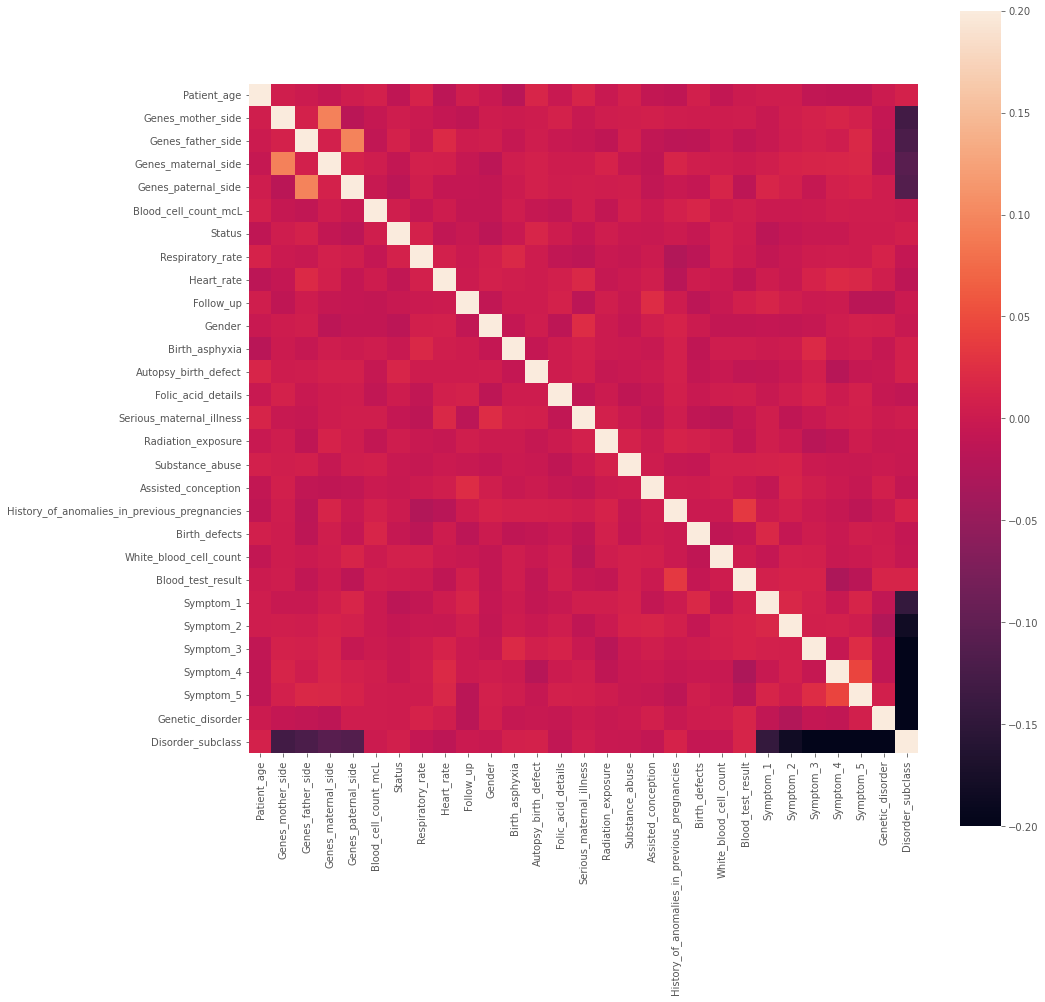

In [45]:
plt.figure(figsize=(15,15))
corr = label_train.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,vmax=0.2,vmin=-0.2, square=True)
plt.show()

# Most of the features do not correlate well with Disorder Subclass( Target Variable 2 ). So, we create some new features of our own to improve classification

In [46]:
label_train['Blood_cell_count_mcL_Squared'] = label_train['Blood_cell_count_mcL']*label_train['Blood_cell_count_mcL']
label_train['Blood_cell_count_mcL_Cubed'] = label_train['Blood_cell_count_mcL']*label_train['Blood_cell_count_mcL']*label_train['Blood_cell_count_mcL']
label_train['Blood_cell_count_mcL_SqRoot'] = np.sqrt(label_train['Blood_cell_count_mcL'])

label_train['White_blood_cell_count_Squared'] = label_train['White_blood_cell_count']*label_train['White_blood_cell_count']
label_train['White_blood_cell_count_Cubed'] = label_train['White_blood_cell_count']*label_train['White_blood_cell_count']*label_train['White_blood_cell_count']
label_train['White_blood_cell_count_SqRoot'] = np.sqrt(label_train['White_blood_cell_count'])

label_train['Total_cell_count'] = label_train['Blood_cell_count_mcL'] + label_train['White_blood_cell_count']
label_train['Total_cell_count_Squared'] = label_train['Total_cell_count']*label_train['Total_cell_count']
label_train['Total_cell_count_Cubed'] = label_train['Total_cell_count']*label_train['Total_cell_count']*label_train['Total_cell_count']
label_train['Total_cell_count_SqRoot'] = np.sqrt(label_train['Total_cell_count'])

label_train['Genes_m_side'] = label_train['Genes_mother_side']+label_train['Genes_maternal_side']
label_train['Genes_m_side_Squared'] = label_train['Genes_m_side']*label_train['Genes_m_side']
label_train['Genes_m_side_Cubed'] = label_train['Genes_m_side']*label_train['Genes_m_side']*label_train['Genes_m_side']
label_train['Genes_m_side_SqRoot'] = np.sqrt(label_train['Genes_m_side'])

label_train['Genes_f_side'] = label_train['Genes_father_side']+label_train['Genes_paternal_side']
label_train['Genes_f_side_Squared'] = label_train['Genes_f_side']*label_train['Genes_f_side']
label_train['Genes_f_side_Cubed'] = label_train['Genes_f_side']*label_train['Genes_f_side']*label_train['Genes_f_side']
label_train['Genes_f_side_SqRoot'] = np.sqrt(label_train['Genes_f_side'])


label_train['Symptom_SumOfSquares'] = ( label_train['Symptom_1']*label_train['Symptom_1'] + label_train['Symptom_2']*label_train['Symptom_2'] + label_train['Symptom_3']*label_train['Symptom_3'] + label_train['Symptom_4']*label_train['Symptom_4'] + label_train['Symptom_5']*label_train['Symptom_5'])
label_train['Symptom_SumOfCubes'] = ( label_train['Symptom_1']*label_train['Symptom_1']*label_train['Symptom_1'] + label_train['Symptom_2']*label_train['Symptom_2']*label_train['Symptom_2'] + label_train['Symptom_3']*label_train['Symptom_3']*label_train['Symptom_3'] + label_train['Symptom_4']*label_train['Symptom_4']*label_train['Symptom_4'] + label_train['Symptom_5']*label_train['Symptom_5']*label_train['Symptom_5'])
label_train['Symptom_SumOfSqRoots'] = ( np.sqrt(label_train['Symptom_1']) + np.sqrt(label_train['Symptom_2']) + np.sqrt(label_train['Symptom_3']) + np.sqrt(label_train['Symptom_4']) + np.sqrt(label_train['Symptom_5']))


label_test['Blood_cell_count_mcL_Squared'] = label_test['Blood_cell_count_mcL']*label_test['Blood_cell_count_mcL']
label_test['Blood_cell_count_mcL_Cubed'] = label_test['Blood_cell_count_mcL']*label_test['Blood_cell_count_mcL']*label_test['Blood_cell_count_mcL']
label_test['Blood_cell_count_mcL_SqRoot'] = np.sqrt(label_test['Blood_cell_count_mcL'])

label_test['White_blood_cell_count_Squared'] = label_test['White_blood_cell_count']*label_test['White_blood_cell_count']
label_test['White_blood_cell_count_Cubed'] = label_test['White_blood_cell_count']*label_test['White_blood_cell_count']*label_test['White_blood_cell_count']
label_test['White_blood_cell_count_SqRoot'] = np.sqrt(label_test['White_blood_cell_count'])

label_test['Total_cell_count'] = label_test['Blood_cell_count_mcL'] + label_test['White_blood_cell_count']
label_test['Total_cell_count_Squared'] = label_test['Total_cell_count']*label_test['Total_cell_count']
label_test['Total_cell_count_Cubed'] = label_test['Total_cell_count']*label_test['Total_cell_count']*label_test['Total_cell_count']
label_test['Total_cell_count_SqRoot'] = np.sqrt(label_test['Total_cell_count'])

label_test['Genes_m_side'] = label_test['Genes_mother_side']+label_test['Genes_maternal_side']
label_test['Genes_m_side_Squared'] = label_test['Genes_m_side']*label_test['Genes_m_side']
label_test['Genes_m_side_Cubed'] = label_test['Genes_m_side']*label_test['Genes_m_side']*label_test['Genes_m_side']
label_test['Genes_m_side_SqRoot'] = np.sqrt(label_test['Genes_m_side'])

label_test['Genes_f_side'] = label_test['Genes_father_side']+label_test['Genes_paternal_side']
label_test['Genes_f_side_Squared'] = label_test['Genes_f_side']*label_test['Genes_f_side']
label_test['Genes_f_side_Cubed'] = label_test['Genes_f_side']*label_test['Genes_f_side']*label_test['Genes_f_side']
label_test['Genes_f_side_SqRoot'] = np.sqrt(label_test['Genes_f_side'])

label_test['Symptom_SumOfSquares'] = ( label_test['Symptom_1']*label_test['Symptom_1'] + label_test['Symptom_2']*label_test['Symptom_2'] + label_test['Symptom_3']*label_test['Symptom_3'] + label_test['Symptom_4']*label_test['Symptom_4'] + label_test['Symptom_5']*label_test['Symptom_5'])
label_test['Symptom_SumOfCubes'] = ( label_test['Symptom_1']*label_test['Symptom_1']*label_test['Symptom_1'] + label_test['Symptom_2']*label_test['Symptom_2']*label_test['Symptom_2'] + label_test['Symptom_3']*label_test['Symptom_3']*label_test['Symptom_3'] + label_test['Symptom_4']*label_test['Symptom_4']*label_test['Symptom_4'] + label_test['Symptom_5']*label_test['Symptom_5']*label_test['Symptom_5'])
label_test['Symptom_SumOfSqRoots'] = ( np.sqrt(label_test['Symptom_1']) + np.sqrt(label_test['Symptom_2']) + np.sqrt(label_test['Symptom_3']) + np.sqrt(label_test['Symptom_4']) + np.sqrt(label_test['Symptom_5']))

In [47]:
label_test.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Blood_cell_count_mcL_Squared,Blood_cell_count_mcL_Cubed,Blood_cell_count_mcL_SqRoot,White_blood_cell_count_Squared,White_blood_cell_count_Cubed,White_blood_cell_count_SqRoot,Total_cell_count,Total_cell_count_Squared,Total_cell_count_Cubed,Total_cell_count_SqRoot,Genes_m_side,Genes_m_side_Squared,Genes_m_side_Cubed,Genes_m_side_SqRoot,Genes_f_side,Genes_f_side_Squared,Genes_f_side_Cubed,Genes_f_side_SqRoot,Symptom_SumOfSquares,Symptom_SumOfCubes,Symptom_SumOfSqRoots
0,6,0,1,0,0,4.98,0,1,0,1,2,2,1,1,0,2,1,0,0,0,12.00,2,1,1,1,1,1,24.8004,123.505992,2.231591,144.0000,1728.000000,3.464102,16.98,288.3204,4895.680392,4.120680,0,0,0,0.000000,1,1,1,1.0,5,5,5.0
1,10,1,0,1,1,5.12,0,0,1,1,2,2,1,1,0,1,1,0,1,0,8.18,1,0,0,0,1,0,26.2144,134.217728,2.262742,66.9124,547.343432,2.860070,13.30,176.8900,2352.637000,3.646917,2,4,8,1.414214,1,1,1,1.0,1,1,1.0
2,5,0,0,0,0,4.88,1,0,0,1,0,1,1,0,1,2,2,1,0,1,12.00,2,0,0,1,1,0,23.8144,116.214272,2.209072,144.0000,1728.000000,3.464102,16.88,284.9344,4809.692672,4.108528,0,0,0,0.000000,0,0,0,0.0,2,2,2.0
3,13,0,1,1,0,4.69,0,0,1,1,0,0,1,1,1,1,1,0,1,1,6.88,1,1,0,1,0,1,21.9961,103.161709,2.165641,47.3344,325.660672,2.622975,11.57,133.8649,1548.816893,3.401470,1,1,1,1.000000,1,1,1,1.0,3,3,3.0
4,5,0,0,1,1,5.15,1,1,1,1,0,0,1,1,1,2,1,0,0,0,6.20,1,1,1,1,1,0,26.5225,136.590875,2.269361,38.4400,238.328000,2.489980,11.35,128.8225,1462.135375,3.368976,1,1,1,1.000000,1,1,1,1.0,4,4,4.0


In [48]:
label_train.dtypes

Patient_age                                       int64
Genes_mother_side                                 int64
Genes_father_side                                 int64
Genes_maternal_side                               int64
Genes_paternal_side                               int64
Blood_cell_count_mcL                            float64
Status                                            int64
Respiratory_rate                                  int64
Heart_rate                                        int64
Follow_up                                         int64
Gender                                            int64
Birth_asphyxia                                    int64
Autopsy_birth_defect                              int64
Folic_acid_details                                int64
Serious_maternal_illness                          int64
Radiation_exposure                                int64
Substance_abuse                                   int64
Assisted_conception                             

# Seperating our target variables and perform data modelling

In [49]:
target1_data = label_train.copy()
target2_data = label_train.copy()
target1_data = label_train.drop('Disorder_subclass', axis=1)
target2_data = label_train.drop('Genetic_disorder', axis=1)

In [50]:
target1_data.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_disorder,Blood_cell_count_mcL_Squared,Blood_cell_count_mcL_Cubed,Blood_cell_count_mcL_SqRoot,White_blood_cell_count_Squared,White_blood_cell_count_Cubed,White_blood_cell_count_SqRoot,Total_cell_count,Total_cell_count_Squared,Total_cell_count_Cubed,Total_cell_count_SqRoot,Genes_m_side,Genes_m_side_Squared,Genes_m_side_Cubed,Genes_m_side_SqRoot,Genes_f_side,Genes_f_side_Squared,Genes_f_side_Cubed,Genes_f_side_SqRoot,Symptom_SumOfSquares,Symptom_SumOfCubes,Symptom_SumOfSqRoots
0,2,1,0,1,0,4.76,0,0,0,0,0,1,1,0,0,0,0,0,1,1,9.86,3,1,1,1,1,1,0,22.6576,107.850176,2.181742,97.2196,958.585256,3.140064,14.62,213.7444,3124.943128,3.823611,2,4,8,1.414214,0,0,0,0.0,5,5,5.0
2,6,1,0,0,0,4.89,0,0,1,1,0,1,1,1,0,2,1,1,1,1,7.47,2,0,1,1,1,1,1,23.9121,116.930169,2.211334,55.8009,416.832723,2.733130,12.36,152.7696,1888.232256,3.515679,1,1,1,1.000000,0,0,0,0.0,4,4,4.0
3,12,1,0,1,0,4.71,1,1,0,0,2,1,0,0,1,1,1,1,1,1,7.92,1,0,0,1,0,0,0,22.1841,104.487111,2.170253,62.7264,496.793088,2.814249,12.63,159.5169,2014.698447,3.553871,2,4,8,1.414214,0,0,0,0.0,1,1,1.0
4,11,1,0,1,1,4.72,0,1,1,1,2,1,1,0,1,1,1,1,0,0,4.10,3,0,0,0,0,0,1,22.2784,105.154048,2.172556,16.8100,68.921000,2.024846,8.82,77.7924,686.128968,2.969848,2,4,8,1.414214,1,1,1,1.0,0,0,0.0
5,14,1,0,1,0,5.10,1,0,0,1,1,1,1,0,0,0,0,1,0,0,10.27,2,1,0,0,1,0,2,26.0100,132.651000,2.258318,105.4729,1083.206683,3.204684,15.37,236.2369,3630.961153,3.920459,2,4,8,1.414214,0,0,0,0.0,2,2,2.0


In [51]:
target2_data.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Disorder_subclass,Blood_cell_count_mcL_Squared,Blood_cell_count_mcL_Cubed,Blood_cell_count_mcL_SqRoot,White_blood_cell_count_Squared,White_blood_cell_count_Cubed,White_blood_cell_count_SqRoot,Total_cell_count,Total_cell_count_Squared,Total_cell_count_Cubed,Total_cell_count_SqRoot,Genes_m_side,Genes_m_side_Squared,Genes_m_side_Cubed,Genes_m_side_SqRoot,Genes_f_side,Genes_f_side_Squared,Genes_f_side_Cubed,Genes_f_side_SqRoot,Symptom_SumOfSquares,Symptom_SumOfCubes,Symptom_SumOfSqRoots
0,2,1,0,1,0,4.76,0,0,0,0,0,1,1,0,0,0,0,0,1,1,9.86,3,1,1,1,1,1,5,22.6576,107.850176,2.181742,97.2196,958.585256,3.140064,14.62,213.7444,3124.943128,3.823611,2,4,8,1.414214,0,0,0,0.0,5,5,5.0
2,6,1,0,0,0,4.89,0,0,1,1,0,1,1,1,0,2,1,1,1,1,7.47,2,0,1,1,1,1,3,23.9121,116.930169,2.211334,55.8009,416.832723,2.733130,12.36,152.7696,1888.232256,3.515679,1,1,1,1.000000,0,0,0,0.0,4,4,4.0
3,12,1,0,1,0,4.71,1,1,0,0,2,1,0,0,1,1,1,1,1,1,7.92,1,0,0,1,0,0,6,22.1841,104.487111,2.170253,62.7264,496.793088,2.814249,12.63,159.5169,2014.698447,3.553871,2,4,8,1.414214,0,0,0,0.0,1,1,1.0
4,11,1,0,1,1,4.72,0,1,1,1,2,1,1,0,1,1,1,1,0,0,4.10,3,0,0,0,0,0,1,22.2784,105.154048,2.172556,16.8100,68.921000,2.024846,8.82,77.7924,686.128968,2.969848,2,4,8,1.414214,1,1,1,1.0,0,0,0.0
5,14,1,0,1,0,5.10,1,0,0,1,1,1,1,0,0,0,0,1,0,0,10.27,2,1,0,0,1,0,2,26.0100,132.651000,2.258318,105.4729,1083.206683,3.204684,15.37,236.2369,3630.961153,3.920459,2,4,8,1.414214,0,0,0,0.0,2,2,2.0


In [52]:
target1_data_y = target1_data['Genetic_disorder']
target1_data_X = target1_data.drop('Genetic_disorder', axis=1) 

target2_data_y = target2_data['Disorder_subclass']
target2_data_X = target2_data.drop('Disorder_subclass', axis=1) 

In [53]:
feat_cols = target1_data_X.columns

# Lets data model for target variable 1 (Genetic disorder)

In [54]:
gX_train, gX_test, gy_train, gy_test = train_test_split(target1_data_X, target1_data_y, random_state=20, test_size=0.2,shuffle=True)

print(gX_train.shape)
print(gX_test.shape)
print(gy_train.shape)
print(gy_test.shape)

(12996, 48)
(3250, 48)
(12996,)
(3250,)


In [55]:
scaler1 = StandardScaler()

gX_train = scaler1.fit_transform(gX_train)
gX_test = scaler1.fit_transform(gX_test)

In [56]:
# lr_g = LogisticRegression(solver='liblinear', random_state=20).fit(gX_train, gy_train)
# gnb_g = GaussianNB().fit(gX_train, gy_train)

# dtc_g = DecisionTreeClassifier(max_depth= 25, random_state=20).fit(gX_train,gy_train)
# rfc_g = RandomForestClassifier(random_state=20,verbose=False).fit(gX_train,gy_train)
gbc_g = GradientBoostingClassifier( learning_rate=0.1,
                                    n_estimators=500,
                                    max_features='auto',
                                   verbose=False).fit(gX_train,gy_train)
knn_g = KNeighborsClassifier(n_neighbors=3).fit(gX_train,gy_train)
# svc_g = SVC(random_state=20).fit(gX_train,gy_train)
# xgbc_g = XGBClassifier(eval_metric='mlogloss').fit(gX_train,gy_train)
# lgbmc_g = LGBMClassifier().fit(gX_train,gy_train)
# catbc_g = CatBoostClassifier(verbose=False).fit(gX_train,gy_train)

In [57]:
#models_g = [ lr_g, gnb_g, dtc_g, rfc_g, gbc_g, svc_g, xgbc_g, lgbmc_g, catbc_g ]
models_g = [ gbc_g, knn_g ]
for model in models_g:
    name = model
    predictions = model.predict(gX_test)
    #R2CV = cross_val_score(model,gX_test,gy_test,cv=10,verbose=False).mean()
    #error = -cross_val_score(model,gX_test,gy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print('Model name ', name)
    print('-------------------')
    #print('R2CV', R2CV)
    #print('error', np.sqrt(error))
    print('Accuracy', accuracy_score(gy_test,predictions))
    print('f1_score ', f1_score(gy_test, predictions, average='macro'))
    print(classification_report(gy_test, predictions))
    print('-------------------')

Model name  GradientBoostingClassifier(max_features='auto', n_estimators=500, verbose=False)
-------------------
Accuracy 0.5984615384615385
f1_score  0.5266356512337534
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1677
           1       0.48      0.34      0.40       362
           2       0.53      0.43      0.47      1211

    accuracy                           0.60      3250
   macro avg       0.55      0.52      0.53      3250
weighted avg       0.58      0.60      0.59      3250

-------------------
Model name  KNeighborsClassifier(n_neighbors=3)
-------------------
Accuracy 0.5058461538461538
f1_score  0.43065695941233634
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1677
           1       0.43      0.21      0.28       362
           2       0.42      0.39      0.40      1211

    accuracy                           0.51      3250
   macro avg       0.47      0.

In [65]:
# #LGBMClf has highest f1 score
# lgbmc_g.get_params()

In [67]:
predictions1 = gbc_g.predict(gX_test)
#R2CV1 = cross_val_score(gbc_g,gX_test,gy_test,cv=10,verbose=False).mean()
#error1 = -cross_val_score(gbc_g,gX_test,gy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
print('LGBM Classifier')
print('----------------------------------------------------')
#print('R2CV', R2CV1)
#print('error', np.sqrt(error1))
print('Accuracy', accuracy_score(gy_test,predictions1))
print('f1_score ', f1_score(gy_test, predictions1, average='macro'))
print(classification_report(gy_test,predictions1))
print('----------------------------------------------------')

LGBM Classifier
----------------------------------------------------
Accuracy 0.5956923076923077
f1_score  0.5245490796545352
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1677
           1       0.48      0.34      0.40       362
           2       0.53      0.43      0.47      1211

    accuracy                           0.60      3250
   macro avg       0.55      0.51      0.52      3250
weighted avg       0.58      0.60      0.58      3250

----------------------------------------------------


In [69]:
featimp = pd.DataFrame( {'Feature':feat_cols , 'Importance': gbc_g.feature_importances_}).sort_values(by ='Importance', ascending=False)
featimp.reset_index(drop=True)


,Feature,Importance
0,Symptom_SumOfCubes,0.207917
1,Symptom_SumOfSquares,0.133574
2,Symptom_SumOfSqRoots,0.113763
3,Patient_age,0.031156
4,Total_cell_count,0.024417
5,Total_cell_count_SqRoot,0.024360
6,Genes_mother_side,0.023526
7,Total_cell_count_Cubed,0.023263
8,Total_cell_count_Squared,0.020362
9,Genes_f_side_SqRoot,0.017299


In [70]:
predictions1.shape

(3250,)

Lets data model for target variable 2 (Disorder subclass)

In [71]:
dX_train, dX_test, dy_train, dy_test = train_test_split(target2_data_X, target2_data_y, random_state=40, test_size=0.2,shuffle=True)

print(dX_train.shape)
print(dX_test.shape)
print(dy_train.shape)
print(dy_test.shape)

(12996, 48)
(3250, 48)
(12996,)
(3250,)


In [72]:
scaler2 = StandardScaler()

dX_train = scaler2.fit_transform(dX_train)
dX_test = scaler2.fit_transform(dX_test)

In [73]:
# lr_d = LogisticRegression(solver='liblinear', random_state=40).fit(dX_train, dy_train)
# gnb_d = GaussianNB().fit(dX_train, dy_train)

# dtc_d = DecisionTreeClassifier(random_state=40).fit(dX_train,dy_train)
# rfc_d = RandomForestClassifier(random_state=40,verbose=False).fit(dX_train,dy_train)
gbc_d = GradientBoostingClassifier(learning_rate=0.1,
                                    n_estimators=500,
                                    max_features='auto',
                                   verbose=False).fit(dX_train,dy_train)
knn = K
# svc_d = SVC(random_state=40).fit(dX_train,dy_train)
# xgbc_d = XGBClassifier(n_estimators=300, random_state=40, learning_rate=0.1, eval_metric='merror').fit(dX_train,dy_train)
# lgbmc_d = LGBMClassifier().fit(dX_train,dy_train)
# catbc_d = CatBoostClassifier(verbose=False).fit(dX_train,dy_train)

In [ ]:
# models_d = [ lr_d, gnb_d, dtc_d, rfc_d, gbc_d, svc_d, xgbc_d, lgbmc_d, catbc_d ]
# for model in models_d:
#     name = model
#     predictions = model.predict(dX_test)
#     R2CV = cross_val_score(model,dX_test,dy_test,cv=10,verbose=False).mean()
#     error = -cross_val_score(model,dX_test,dy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
#     print('Model name ', name)
#     print('-----------------------------------------------------')
#     print('R2CV', R2CV)
#     print('error', np.sqrt(error))
#     print('Accuracy', accuracy_score(dy_test,predictions))
#     print('f1_score ', f1_score(dy_test, predictions, average='macro'))
#     print(classification_report(dy_test,predictions))
#     print('-----------------------------------------------------')

In [ ]:
#XGBClf has highest f1 score

In [74]:
predictions2 = gbc_d.predict(dX_test)
#R2CV2 = cross_val_score(gbc_d,dX_test,dy_test,cv=10,verbose=False).mean()
#error2 = -cross_val_score(gbc_d,dX_test,dy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
print('DT Clf')
print('-------------------')
#print('R2CV', R2CV2)
#print('error', np.sqrt(error2))
print('Accuracy', accuracy_score(dy_test,predictions2))
print('f1_score ', f1_score(dy_test, predictions2, average='macro'))
print(classification_report(dy_test,predictions2))
print('-------------------')

DT Clf
-------------------
Accuracy 0.38861538461538464
f1_score  0.3111967304534191
              precision    recall  f1-score   support

           0       0.35      0.25      0.29        24
           1       0.12      0.07      0.09        14
           2       0.45      0.49      0.47       602
           3       0.36      0.24      0.29       311
           4       0.35      0.26      0.30       230
           5       0.23      0.18      0.20        96
           6       0.40      0.46      0.43       814
           7       0.36      0.41      0.39       686
           8       0.37      0.32      0.34       473

    accuracy                           0.39      3250
   macro avg       0.33      0.30      0.31      3250
weighted avg       0.38      0.39      0.38      3250

-------------------


In [75]:
label_test.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,Gender,Birth_asphyxia,Autopsy_birth_defect,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,Birth_defects,White_blood_cell_count,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Blood_cell_count_mcL_Squared,Blood_cell_count_mcL_Cubed,Blood_cell_count_mcL_SqRoot,White_blood_cell_count_Squared,White_blood_cell_count_Cubed,White_blood_cell_count_SqRoot,Total_cell_count,Total_cell_count_Squared,Total_cell_count_Cubed,Total_cell_count_SqRoot,Genes_m_side,Genes_m_side_Squared,Genes_m_side_Cubed,Genes_m_side_SqRoot,Genes_f_side,Genes_f_side_Squared,Genes_f_side_Cubed,Genes_f_side_SqRoot,Symptom_SumOfSquares,Symptom_SumOfCubes,Symptom_SumOfSqRoots
0,6,0,1,0,0,4.98,0,1,0,1,2,2,1,1,0,2,1,0,0,0,12.00,2,1,1,1,1,1,24.8004,123.505992,2.231591,144.0000,1728.000000,3.464102,16.98,288.3204,4895.680392,4.120680,0,0,0,0.000000,1,1,1,1.0,5,5,5.0
1,10,1,0,1,1,5.12,0,0,1,1,2,2,1,1,0,1,1,0,1,0,8.18,1,0,0,0,1,0,26.2144,134.217728,2.262742,66.9124,547.343432,2.860070,13.30,176.8900,2352.637000,3.646917,2,4,8,1.414214,1,1,1,1.0,1,1,1.0
2,5,0,0,0,0,4.88,1,0,0,1,0,1,1,0,1,2,2,1,0,1,12.00,2,0,0,1,1,0,23.8144,116.214272,2.209072,144.0000,1728.000000,3.464102,16.88,284.9344,4809.692672,4.108528,0,0,0,0.000000,0,0,0,0.0,2,2,2.0
3,13,0,1,1,0,4.69,0,0,1,1,0,0,1,1,1,1,1,0,1,1,6.88,1,1,0,1,0,1,21.9961,103.161709,2.165641,47.3344,325.660672,2.622975,11.57,133.8649,1548.816893,3.401470,1,1,1,1.000000,1,1,1,1.0,3,3,3.0
4,5,0,0,1,1,5.15,1,1,1,1,0,0,1,1,1,2,1,0,0,0,6.20,1,1,1,1,1,0,26.5225,136.590875,2.269361,38.4400,238.328000,2.489980,11.35,128.8225,1462.135375,3.368976,1,1,1,1.000000,1,1,1,1.0,4,4,4.0


We use LGBM Clf for prediction of Genetic Disorder and XGB Clf for Disorder subclass

In [76]:
# Actual Predictions
target1_data = label_train.copy()
target2_data = label_train.copy()
target1_data = label_train.drop('Disorder_subclass', axis=1)
target2_data = label_train.drop('Genetic_disorder', axis=1)

target1_data_y = target1_data['Genetic_disorder']
target1_data_X = target1_data.drop('Genetic_disorder', axis=1) 

target2_data_y = target2_data['Disorder_subclass']
target2_data_X = target2_data.drop('Disorder_subclass', axis=1) 

scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()

X_train_1 = scaler3.fit_transform(target1_data_X)
X_train_2 = scaler4.fit_transform(target2_data_X)
X_test = scaler5.fit_transform(label_test)

model_g = GradientBoostingClassifier(verbose=False).fit(X_train_1,target1_data_y)
model_d = GradientBoostingClassifier(verbose=False).fit(X_train_2,target2_data_y)

var1 = model_g.predict(X_test)
var2 = model_d.predict(X_test)

In [77]:
var1.shape

(9465,)

In [78]:
var2.shape

(9465,)

In [79]:
var1

array([2, 2, 2, ..., 2, 1, 0], dtype=int64)

In [80]:
var2

array([2, 8, 8, ..., 4, 2, 2], dtype=int64)

In [81]:
ans1 = labelencoder1.inverse_transform(var1)
ans1

array(['Single-gene inheritance diseases',
       'Single-gene inheritance diseases',
       'Single-gene inheritance diseases', ...,
       'Single-gene inheritance diseases',
       'Multifactorial genetic inheritance disorders',
       'Mitochondrial genetic inheritance disorders'], dtype=object)

In [82]:
ans2 = labelencoder2.inverse_transform(var2)
ans2

array(['Cystic fibrosis', 'Tay-Sachs', 'Tay-Sachs', ...,
       'Hemochromatosis', 'Cystic fibrosis', 'Cystic fibrosis'],
      dtype=object)

In [83]:
list(ids)

['PID0x4175',
 'PID0x21f5',
 'PID0x49b8',
 'PID0x2d97',
 'PID0x58da',
 'PID0x96b6',
 'PID0x399',
 'PID0x6819',
 'PID0x9697',
 'PID0x628a',
 'PID0x17c8',
 'PID0x12d4',
 'PID0x92e',
 'PID0x4246',
 'PID0x3623',
 'PID0x2c18',
 'PID0x1fe8',
 'PID0x50fa',
 'PID0x6351',
 'PID0x815',
 'PID0x4963',
 'PID0x1660',
 'PID0x8dd5',
 'PID0x8a85',
 'PID0x7cfc',
 'PID0x5e07',
 'PID0x2b91',
 'PID0x3da9',
 'PID0x3ef3',
 'PID0x5148',
 'PID0x4f48',
 'PID0x106',
 'PID0x1b9a',
 'PID0x3923',
 'PID0x3195',
 'PID0x4f39',
 'PID0x5ebf',
 'PID0x61c7',
 'PID0x7f19',
 'PID0x2891',
 'PID0x8cba',
 'PID0x6ed6',
 'PID0x24cc',
 'PID0x8da6',
 'PID0x5e25',
 'PID0xe49',
 'PID0x5b4f',
 'PID0x95a3',
 'PID0x38aa',
 'PID0x6807',
 'PID0xaa9',
 'PID0x715c',
 'PID0x6939',
 'PID0x73a1',
 'PID0x2357',
 'PID0xb62',
 'PID0x901b',
 'PID0x9327',
 'PID0x1455',
 'PID0x4583',
 'PID0x267f',
 'PID0x619c',
 'PID0x3de3',
 'PID0xdc0',
 'PID0x2c90',
 'PID0x2e70',
 'PID0x148a',
 'PID0x7c35',
 'PID0x2ec1',
 'PID0x2b32',
 'PID0x5e23',
 'PID0x7ce7',


In [84]:
submission = pd.DataFrame( {'Patient Id': ids,'Genetic Disorder': ans1,'Disorder Subclass': ans2} )
submission

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Single-gene inheritance diseases,Cystic fibrosis
1,PID0x21f5,Single-gene inheritance diseases,Tay-Sachs
2,PID0x49b8,Single-gene inheritance diseases,Tay-Sachs
3,PID0x2d97,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x58da,Mitochondrial genetic inheritance disorders,Cystic fibrosis
...,...,...,...
9460,PID0x81e1,Mitochondrial genetic inheritance disorders,Cystic fibrosis
9461,PID0x3514,Mitochondrial genetic inheritance disorders,Cystic fibrosis
9462,PID0x5408,Single-gene inheritance diseases,Hemochromatosis
9463,PID0x2017,Multifactorial genetic inheritance disorders,Cystic fibrosis


In [85]:
submission.to_csv('submission3.csv', index=False)

In [86]:
from google.colab import files
files.download('submission3.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>